# Minimum fuel optimal control

$\newcommand{\real}{\mathbb{R}}\newcommand{\modulus}[1]{\left| #1 \right|}$
We consider a linear dynamical system with state
$x(t) \in \real^n$, $t = 0,\ldots,N$, and actuator or input signal $u(t) \in \real$, for $t = 0,\ldots,N − 1$. The dynamics of the system is given by the linear recurrence
$$ x(t+1)=Ax(t)+bu(t), t=0,\ldots,N−1,$$
where $A \in \real^{n\times n}$ and $b \in \real^n$ are given. We assume that the initial state is zero, i.e.,
$x(0) = 0$.
The minimum fuel optimal control problem is to choose the inputs
$u(0),\ldots, u(N − 1)$ so
as to minimize the total fuel consumed, which is given by
$$ F = \sum_{t=0}^{N −1} f(u(t)),
$$
subject to the constraint that $x(N) = x_{des}$, where $N$ is the (given) time horizon, and $x_{des} \in \real^n$ is the (given) desired final or target state. The function $f : \real \mapsto \real$ is the fuel use map for the actuator, and gives the amount of fuel used as a function of the actuator signal amplitude. In this problem we use
$$
f(a)= \begin{cases} \modulus{a} & \modulus{a} \leq 1 \\
2\modulus{a}−1 & \modulus{a}>1.
\end{cases}
$$
This means that fuel use is proportional to the absolute value of the actuator signal, for actuator signals between −1 and 1; for larger actuator signals the marginal fuel efficiency is half.

### Formulate the minimum fuel optimal control problem as an LP and solve it for the data given below.

In [1]:
# Load the gams extension
%load_ext gams_magic

__The GAMS Data:__  Note the use of compiler strings N and the compile time eval of N-1 (NM1)

In [2]:
%%gams
option limrow=100, limcol=0;

$if not set N $set N 50
$eval NM1 %N%-1
set t times /0*%N%/;
set i /x,y,dx,dy/; alias(i,j);
set ct(t) control times /0*%NM1%/;

parameter A(i,j) /x.x 1, x.y -0.1, y.x -0.5, y.y 0.5, dx.dx 0.1, dx.dy -1.1, dy.dx 0.5, dy.y -0.5/,
          b(i) /x 1, y 1, dx 1, dy 1/,
          xdes(i) /x 2, y -1/;

In [4]:
%%gams
  
option limrow=100, limcol=0;

$if not set N $set N 50
$eval NM1 %N%-1
set t times /0*%N%/;
set i /x,y,dx,dy/; alias(i,j);
set ct(t) control times /0*%NM1%/;

parameter A(i,j) /x.x 1, x.y -0.1, y.x -0.5, y.y 0.5, dx.dx 0.1, dx.dy -1.1, dy.dx 0.5, dy.y -0.5/,
          b(i) /x 1, y 1, dx 1, dy 1/,
          xdes(i) /x 2, y -1/;
    
variable x(i,t);
variable u(t); 

variable FF;
variable f(t);

x.fx(i,'0') = 0;

equations flondef, frondef, flopdef, fropdef, dynamics, FFdef, target;

flondef(t).. f(t) =G= -2*u(t) - 1 ;  
frondef(t).. f(t) =G= -u(t) ;
flopdef(t).. f(t) =G= u(t) ;
fropdef(t).. f(t) =G= 2*u(t) - 1 ;

dynamics(i,ct(t)).. x(i,t+1) =E= sum(j, A(i,j)*x(j,t) ) + b(i)*u(t) ;

FFdef.. FF =E= sum(t, f(t) );
target(i).. x(i,'%N%') =E= xdes(i);

model fuel /all/;
solve fuel using lp min FF;

display u.L;
display x.L;
display f.L;
display FF.L;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),1.3328,409,307,LP,CPLEX,0.015


__Pull the objective values from GAMS:__

In [5]:
%gams_pull -d x u
display(x,u)

,i,t,level,marginal,lower,upper,scale
0,x,0,0.000000,-1.309016,0.0,0.0,1.0
1,x,1,0.019631,0.000000,-inf,inf,1.0
2,x,2,0.017668,0.000000,-inf,inf,1.0
3,x,3,0.017668,0.000000,-inf,inf,1.0
4,x,4,0.018551,0.000000,-inf,inf,1.0
...,...,...,...,...,...,...,...
199,dy,46,0.147525,0.000000,-inf,inf,1.0
200,dy,47,0.357021,0.000000,-inf,inf,1.0
201,dy,48,1.077454,0.000000,-inf,inf,1.0
202,dy,49,0.090199,0.000000,-inf,inf,1.0


,t,level,marginal,lower,upper,scale
0,0,0.019631,0.0,-inf,inf,1.0
1,1,0.000000,0.0,-inf,inf,1.0
2,2,0.000000,0.0,-inf,inf,1.0
3,3,0.000000,0.0,-inf,inf,1.0
4,4,0.000000,0.0,-inf,inf,1.0
5,5,0.000000,0.0,-inf,inf,1.0
6,6,0.000000,0.0,-inf,inf,1.0
7,7,0.000000,0.0,-inf,inf,1.0
8,8,0.000000,0.0,-inf,inf,1.0
9,9,0.000000,0.0,-inf,inf,1.0


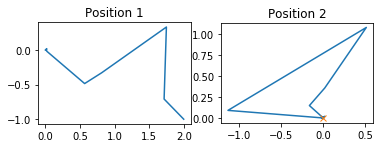

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

xy = x.loc[x['i']=='y','level']
xx = x.loc[x['i']=='x','level']
axs[0].plot(xx, xy)
axs[0].set_aspect("equal")
axs[0].set_title('Position 1')
 
xy = x.loc[x['i']=='dy','level']
xx = x.loc[x['i']=='dx','level']
axs[1].plot(xx, xy)
axs[1].plot(xx[-1:], xy[-1:], marker='x')
axs[1].set_aspect("equal")
axs[1].set_title('Position 2');